In [46]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

In [47]:
tenda_sp_suzano = pd.read_csv('tenda_propostas_SP_SUZANO.csv',sep=';',decimal = ',')

In [3]:
tenda_sp_suzano.dtypes

Chave unica                       object
Preco Venda                      float64
Renda_Bruta_Familiar_Proposta    float64
FGTS_familiar_Proposta           float64
dtype: object

In [4]:
tenda_sp_suzano.head()

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,PRO17071700007352046,148413.3,2521.9,18245.5
1,PRO17072101192351982,141876.7,3349.9,2800.3
2,PRO17081805182351540,146905.0,2347.7,0.0
3,PRO17092010096351721,150073.8,2755.0,4490.3
4,PRO238580F0C6C7351738,144836.5,1234.0,0.0


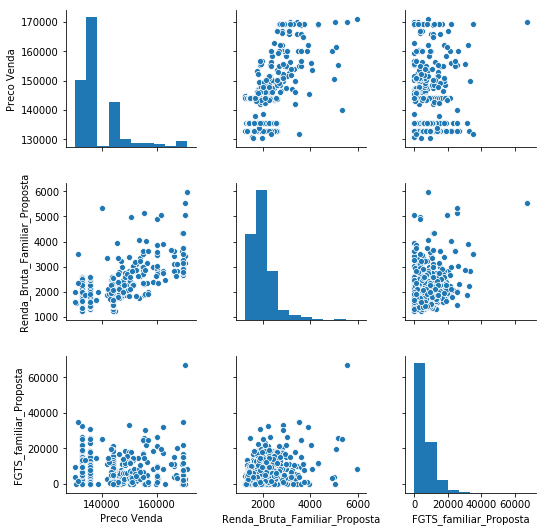

In [5]:
sb.pairplot(tenda_sp_suzano)

In [6]:
tenda_drop_sp_suzano = tenda_sp_suzano.drop(['Chave unica'],axis = 1)
tenda_drop_sp_suzano

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,148413.3,2521.9,18245.5
1,141876.7,3349.9,2800.3
2,146905.0,2347.7,0.0
3,150073.8,2755.0,4490.3
4,144836.5,1234.0,0.0
5,147055.6,1795.4,4140.2
6,146327.7,2301.7,2009.1
7,141876.7,1882.7,11105.9
8,143342.6,2484.0,0.0
9,148413.3,1872.0,10486.3


K_MEANS (RS)

In [7]:
from sklearn.cluster import KMeans

In [8]:
sb.set_style('darkgrid')

In [9]:
wcss = []

1 106703629661.21838
2 57990145246.35264
3 40659660332.42083
4 28452684090.552456
5 22711112060.907326
6 17961103328.906708
7 14758080903.028767
8 14071964955.615416
9 12222311037.380772


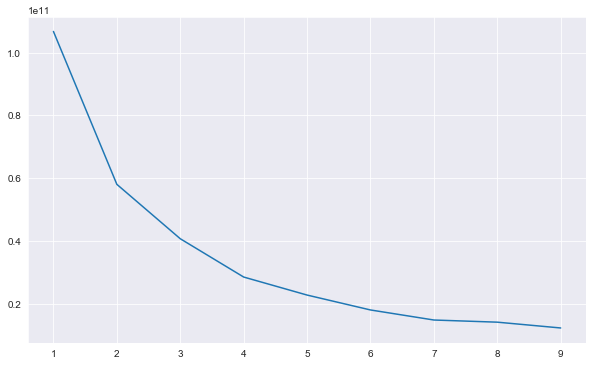

In [10]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(tenda_drop_sp_suzano)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(10, 6))    
pl.plot(range(1, 10), wcss)    

In [36]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [37]:
kmeans.fit(tenda_drop_sp_suzano)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [38]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 0])

CLASSES CRIADAS 

In [49]:
tenda_sp_suzano['Kclasses'] = kmeans.labels_

In [50]:
tenda_sp_suzano. head(20)

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
0,PRO17071700007352046,148413.3,2521.9,18245.5,2
1,PRO17072101192351982,141876.7,3349.9,2800.3,2
2,PRO17081805182351540,146905.0,2347.7,0.0,2
3,PRO17092010096351721,150073.8,2755.0,4490.3,2
4,PRO238580F0C6C7351738,144836.5,1234.0,0.0,2
5,PRO246222W6G0W0352011,147055.6,1795.4,4140.2,2
6,PRO246223G5W7K2351998,146327.7,2301.7,2009.1,2
7,PRO246225W1R7B6351982,141876.7,1882.7,11105.9,2
8,PRO246427F2F8X6352009,143342.6,2484.0,0.0,2
9,PRO246569T7R9B8352046,148413.3,1872.0,10486.3,2


In [51]:
tenda_sp_suzano['Kclasses'] = kmeans.labels_

In [52]:
tenda_sp_suzano.Kclasses.value_counts()

0    835
2    250
1     65
Name: Kclasses, dtype: int64

PERFIL DOS CLUSTER'S GERADOS

In [53]:
tenda_sp_suzano.describe().round(2)

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
count,1150.00,1150.00,1150.00,1150.00
mean,138690.74,1990.97,5781.79,0.49
std,7740.12,520.85,5717.14,0.83
min,130391.10,1234.00,0.00,0.00
25%,135667.00,1663.40,1585.92,0.00
50%,135677.00,1875.85,4822.10,0.00
75%,144000.00,2163.28,8162.83,1.00
max,170841.50,5959.50,66877.20,2.00


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


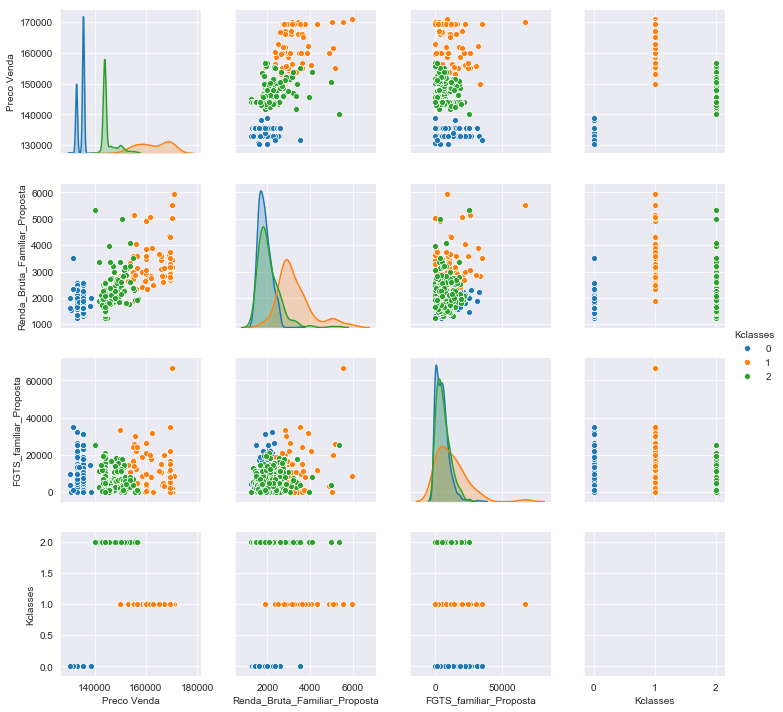

In [54]:
sb.pairplot(tenda_sp_suzano,hue='Kclasses')

EXPORTANDO DADOS

In [55]:
tenda_sp_suzano.to_csv('clustertenda_SP_SUZANO.csv',sep=';',decimal=',')